**Importing the packages**

In [7]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD

In [8]:
card = pd.read_csv("F:/creditcard.csv")
X = card.iloc[:,:-1]
y = card['Class']

**Displays the first five column of the file**

In [9]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
frauds = card.loc[card['Class'] == 1]
non_frauds = card.loc[card['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "regular data points.")

We have 492 fraud data points and 284315 regular data points.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
print(("Size of X_training set:"  , X_train.shape))
print(("Size of X_testing set:"  , X_test.shape))
print(("Size of y_training set:"  , y_train.shape))
print(("Size of y_testing set:"  , y_test.shape))

('Size of X_training set:', (199364, 30))
('Size of X_testing set:', (85443, 30))
('Size of y_training set:', (199364,))
('Size of y_testing set:', (85443,))


In [13]:
model =Sequential ()
model.add(Dense(30, input_dim=30, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(12, activation='sigmoid'))  
model.add(Dense(output_dim = 1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


C:\Users\prakhar\Anaconda32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  after removing the cwd from sys.path.


In [14]:
model.fit(X_train.as_matrix(), y_train, epochs=1)

C:\Users\prakhar\Anaconda32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Epoch 1/1
199364/199364 [==============================] - 206s 1ms/step - loss: 0.0295 - acc: 0.9928


In [15]:
import pandas_ml as pdml

In [16]:
print("Loss: ", model.evaluate(X_test.as_matrix(), y_test, verbose=0))

C:\Users\prakhar\Anaconda32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Loss:  [0.013343894830543296, 0.9982210362463865]


In [17]:
y_predicted = model.predict(X_test.as_matrix()).T[0].astype(int)

C:\Users\prakhar\Anaconda32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


C:\Users\prakhar\Anaconda32\lib\site-packages\pandas_ml\confusion_matrix\abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


Confusion matrix:
Predicted      0  1  __all__
Actual                      
0          85291  0    85291
1            152  0      152
__all__    85443  0    85443


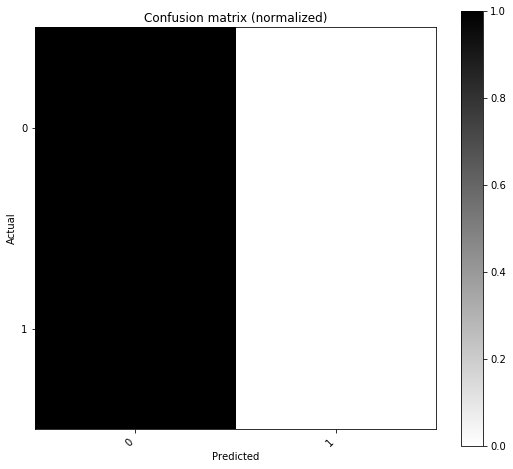

In [18]:
from  pandas_ml import ConfusionMatrix
y_right = np.array(y_test)
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()

In [19]:
confusion_matrix.print_stats()

C:\Users\prakhar\Anaconda32\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted      0  1  __all__
Actual                      
0          85291  0    85291
1            152  0      152
__all__    85443  0    85443


Overall Statistics:

Accuracy: 0.9982210362463865
95% CI: (0.9979149967071745, 0.998492406419685)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0           1
Population                                  85443       85443
P: Condition positive                       85291         152
N: Condition negative                         152       85291
Test outcome positive                       85443           0
Test outcome negative                           0       85443
TP: True Positive                           85291           0
TN: True Negative                               0       85291
FP: False Positive                            152           0
FN: False Negative                              0         152
TPR:

Oversampling of the minority class will be done since the data is highly unbalanced so it is necessary to sample the data 

In [20]:
from  sklearn.decomposition  import PCA
from sklearn.preprocessing import scale

In [21]:
card2 = pdml.ModelFrame(X_train, target=y_train)
sampler = card2.imbalance.over_sampling.SMOTE()
oversampled = card2.fit_sample(sampler)
X2, y2 = oversampled.iloc[:,:-1], oversampled['Class']

data = scale(X2)
pca = PCA(n_components=10)
X2 = pca.fit_transform(data)
X2

array([[-2.95471012,  0.37410485,  0.21883357, ..., -2.01557306,
        -0.20378288, -1.44046616],
       [-2.39217114,  0.12965183,  0.20123027, ..., -0.35551513,
        -1.07515708, -0.57148599],
       [-2.39091881, -0.39023063,  0.4076569 , ...,  0.61543559,
         1.16229343,  0.4468431 ],
       ...,
       [-0.19094013, -0.21767987, -1.00595734, ...,  0.54894392,
        -1.33106527,  0.07856273],
       [ 2.12447609,  0.21553004, -0.48858723, ..., -0.34750073,
         1.08249694, -1.54325006],
       [ 1.4568578 ,  0.59286471,  0.32027854, ..., -1.45906593,
         1.19225207,  0.54273748]])

In [24]:
model2=Sequential()
model2.add(Dense(10, input_dim=10, activation='relu')) 
model2.add(Dense(27, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(30, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(15, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 27)                297       
_________________________________________________________________
dropout_4 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 30)                840       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_6 (Dropout)          (None, 15)                0         
__________

In [25]:
X2_test  = pca.fit_transform(X_test)
h = model2.fit(X2, y2, epochs=1, validation_data=(X2_test, y_test),batch_size=100)

Train on 398048 samples, validate on 85443 samples
Epoch 1/1
398048/398048 [==============================] - 2373s 6ms/step - loss: 0.2473 - acc: 0.8998 - val_loss: 8.4513 - val_acc: 0.4699


In [26]:
print("Loss: ", model2.evaluate(X2_test, y_test, verbose=2))

Loss:  [8.45128539403168, 0.4698922088413305]


In [27]:
y2_predicted  = np.round(model2.predict(X2_test)).T[0]
y2_correct = np.array(y_test)

Confusion matrix:
Predicted  False   True  __all__
Actual                          
False      40047  45244    85291
True          50    102      152
__all__    40097  45346    85443


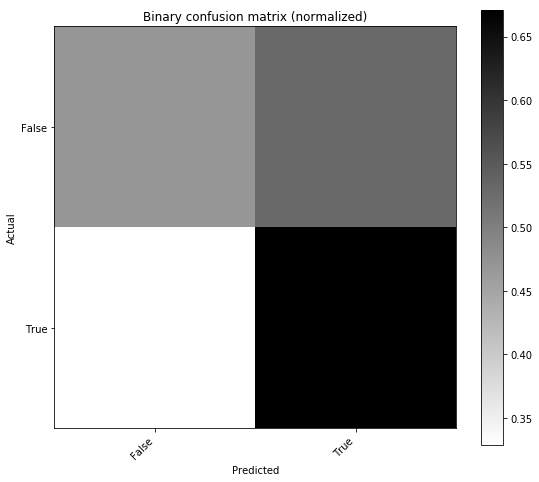

population: 85443
P: 152
N: 85291
PositiveTest: 45346
NegativeTest: 40097
TP: 102
TN: 40047
FP: 45244
FN: 50
TPR: 0.6710526315789473
TNR: 0.4695337139909252
PPV: 0.0022493714991399464
NPV: 0.9987530239170013
FPR: 0.5304662860090749
FDR: 0.99775062850086
FNR: 0.32894736842105265
ACC: 0.4698922088409817
F1_score: 0.004483713569827246
MCC: 0.011871103923868476
informedness: 0.1405863455698726
markedness: 0.0010023954161411108
prevalence: 0.00177896375361352
LRP: 1.2650240915922553
LRN: 0.700583064898744
DOR: 1.8056732384404561
FOR: 0.001246976082998728


In [28]:
confusion_matrix2 = ConfusionMatrix(y2_correct, y2_predicted)
print("Confusion matrix:\n%s" % confusion_matrix2)
confusion_matrix2.plot(normalized=True)
plt.show()
confusion_matrix2.print_stats()

In [67]:
confusion_matrix2.print_stats()

population: 85443
P: 125
N: 85318
PositiveTest: 45225
NegativeTest: 40218
TP: 83
TN: 40176
FP: 45142
FN: 42
TPR: 0.664
TNR: 0.4708971143252303
PPV: 0.0018352681039248203
NPV: 0.9989556914814263
FPR: 0.5291028856747697
FDR: 0.9981647318960751
FNR: 0.336
ACC: 0.4711796168205704
F1_score: 0.0036604189636163177
MCC: 0.010329480413444666
informedness: 0.13489711432523022
markedness: 0.0007909595853510254
prevalence: 0.0014629636131690132
LRP: 1.2549544105267822
LRN: 0.713531660692951
DOR: 1.758792888472566
FOR: 0.001044308518573773
